In [1]:
#hide
import warnings
warnings.filterwarnings('ignore')

In [2]:
import fastbook
fastbook.setup_book()
from fastbook import *

In [3]:
from fastai.vision.all import *

In [4]:
path = Path('/home/saiamrit/Downloads/landscape_data/data')
path.ls()

(#2) [Path('/home/saiamrit/Downloads/landscape_data/data/seg_train'),Path('/home/saiamrit/Downloads/landscape_data/data/seg_test')]

In [5]:
landscape_data = ImageDataLoaders.from_folder(path, 
                                         train='seg_train', valid='seg_test',
                                         item_tfms=Resize(100),
                                         batch_tfms=[Resize(64), Normalize(imagenet_stats)])

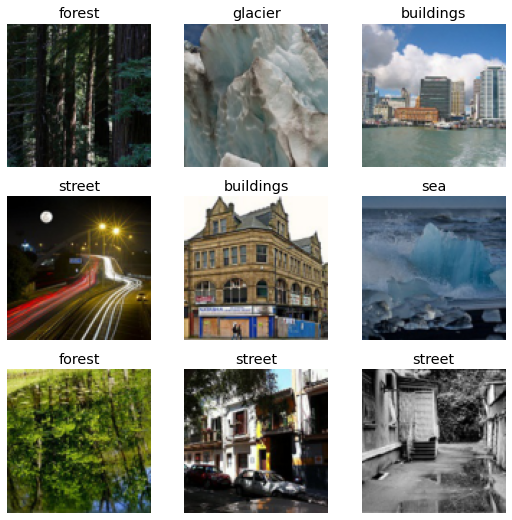

In [6]:
landscape_data.train.show_batch()

In [7]:
learn = cnn_learner(landscape_data, resnet18, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.691967,0.482176,0.836000,00:38


epoch,train_loss,valid_loss,accuracy,time
0,0.383999,0.286840,0.902000,02:54
1,0.233947,0.299627,0.899667,03:17
2,0.114737,0.278165,0.910333,03:26
3,0.043091,0.320453,0.911000,03:23
4,0.019718,0.331121,0.914333,03:26


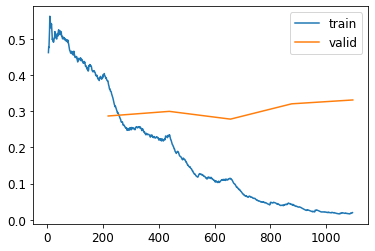

In [8]:
learn.recorder.plot_loss()

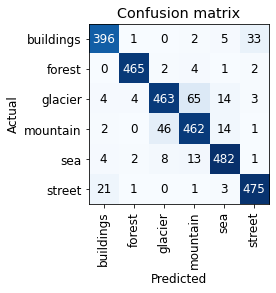

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

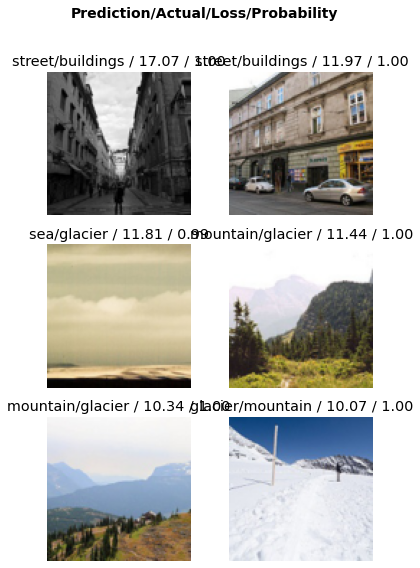

In [11]:
interp.plot_top_losses(6, nrows=3)

In [12]:
learn.export()